In [ ]:
import pandas as pd

df = pd.read_csv("TSLA.csv")

df

,Index,date,close
0,1,11/15/2024,320.72
1,2,11/14/2024,311.18
2,3,11/13/2024,330.24
3,4,11/12/2024,328.49
4,5,11/11/2024,350.00
...,...,...,...
1253,1254,11/22/2019,22.20
1254,1255,11/21/2019,23.66
1255,1256,11/20/2019,23.48
1256,1257,11/19/2019,23.97


In [ ]:
df = df[['date', 'close']]

df

,date,close
0,11/15/2024,320.72
1,11/14/2024,311.18
2,11/13/2024,330.24
3,11/12/2024,328.49
4,11/11/2024,350.00
...,...,...
1253,11/22/2019,22.20
1254,11/21/2019,23.66
1255,11/20/2019,23.48
1256,11/19/2019,23.97


In [ ]:
df['date']

,date
0,11/15/2024
1,11/14/2024
2,11/13/2024
3,11/12/2024
4,11/11/2024
...,...
1253,11/22/2019
1254,11/21/2019
1255,11/20/2019
1256,11/19/2019


In [ ]:
import datetime

def temp(s):
  split = s.split("/")
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year = year, month = month, day = day)
df['date'] = df['date'].apply(temp)

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

<ipython-input-4-929b89a2456b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['date'].apply(temp)


datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:

df

,date,close
0,2024-11-15,320.72
1,2024-11-14,311.18
2,2024-11-13,330.24
3,2024-11-12,328.49
4,2024-11-11,350.00
...,...,...
1253,2019-11-22,22.20
1254,2019-11-21,23.66
1255,2019-11-20,23.48
1256,2019-11-19,23.97


In [ ]:
df.index = df.pop("date")
df

,close
date,
2024-11-15,320.72
2024-11-14,311.18
2024-11-13,330.24
2024-11-12,328.49
2024-11-11,350.00
...,...
2019-11-22,22.20
2019-11-21,23.66
2019-11-20,23.48


flip it so you get from old to newest

In [ ]:
df = df.sort_values(by='date', ascending=True)
df

,close
date,
2019-11-18,23.33
2019-11-19,23.97
2019-11-20,23.48
2019-11-21,23.66
2019-11-22,22.20
...,...
2024-11-11,350.00
2024-11-12,328.49
2024-11-13,330.24


Until now I downloaded the Microsoft stock history, filtered it for just the date and close value, and changed the date format uding Pandas. Now it's time to use Matlab to plot it.


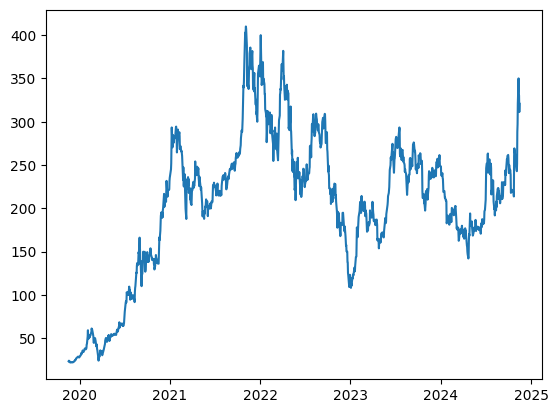

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index,  df['close'])

Convert to a supervised learning problem as we're using LSTM's

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=15):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2020-11-25	',
                                '2024-11-15',
                                n=15)
windowed_df

,Target Date,Target-15,Target-14,Target-13,Target-12,Target-11,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2020-11-25,140.33,146.03,143.32,140.42,136.79,139.04,137.25,136.17,136.03,147.20,162.21,166.42,163.20,173.95,185.13,191.33
1,2020-11-27,146.03,143.32,140.42,136.79,139.04,137.25,136.17,136.03,147.20,162.21,166.42,163.20,173.95,185.13,191.33,195.25
2,2020-11-30,143.32,140.42,136.79,139.04,137.25,136.17,136.03,147.20,162.21,166.42,163.20,173.95,185.13,191.33,195.25,189.20
3,2020-12-01,140.42,136.79,139.04,137.25,136.17,136.03,147.20,162.21,166.42,163.20,173.95,185.13,191.33,195.25,189.20,194.92
4,2020-12-02,136.79,139.04,137.25,136.17,136.03,147.20,162.21,166.42,163.20,173.95,185.13,191.33,195.25,189.20,194.92,189.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-11-11,218.85,217.97,213.65,260.48,269.19,262.51,259.52,257.55,249.85,248.98,242.84,251.44,288.53,296.91,321.22,350.00
996,2024-11-12,217.97,213.65,260.48,269.19,262.51,259.52,257.55,249.85,248.98,242.84,251.44,288.53,296.91,321.22,350.00,328.49
997,2024-11-13,213.65,260.48,269.19,262.51,259.52,257.55,249.85,248.98,242.84,251.44,288.53,296.91,321.22,350.00,328.49,330.24
998,2024-11-14,260.48,269.19,262.51,259.52,257.55,249.85,248.98,242.84,251.44,288.53,296.91,321.22,350.00,328.49,330.24,311.18


Now, we have a date and the cost of the stock at target, and we have the price upto 3 days ago as well all stored in one windowed panda. So now we can use the previous 3 days to see how it let upto the target date, and train the model.

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1000,), (1000, 15, 1), (1000,))

Split the data into train validation and testing partitions

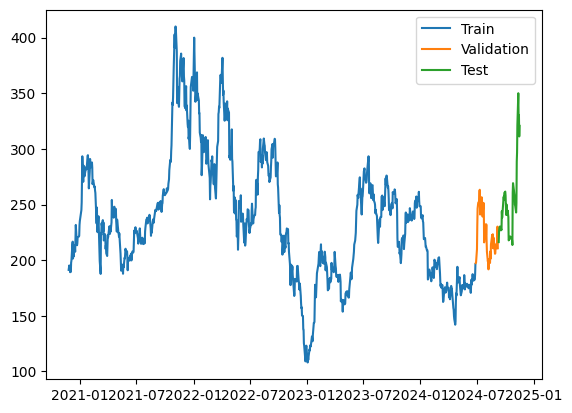

In [ ]:
q_80 = int(len(dates) * .9) #Train until here
q_90 = int(len(dates) * .95) #validate until here
                            #Test for final 10%

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Time to train and validate our tensorflow model

In [ ]:
from tensorflow.keras.models import Sequential #Buliding a Sequential model
from tensorflow.keras.optimizers import Adam #Optimizer
from tensorflow.keras import layers

model = Sequential([
    layers.Input((15, 1)),
    layers.LSTM(64),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 58472.3711 - mean_absolute_error: 235.2320 - val_loss: 47688.7188 - val_mean_absolute_error: 217.4822
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 54582.2969 - mean_absolute_error: 227.1834 - val_loss: 42725.5312 - val_mean_absolute_error: 205.7544
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48497.6836 - mean_absolute_error: 213.3012 - val_loss: 32267.4082 - val_mean_absolute_error: 178.5388
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35520.2266 - mean_absolute_error: 179.7530 - val_loss: 13649.3223 - val_mean_absolute_error: 115.1323
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15879.9326 - mean_absolute_error: 111.6535 - val_loss: 1619.1183 - val_mean_absolute_error: 35.0536
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4176.3545 - mean_absolute_error: 49.5053 - val_loss: 561.1077 - val_mean_absolute_error: 21.1733
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


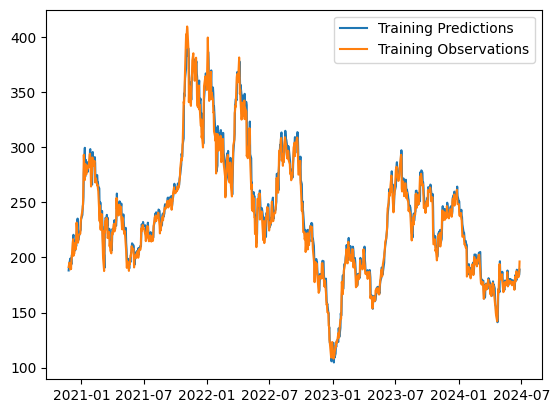

In [ ]:
train_predictions = model.predict(X_train).flatten()
plt. plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


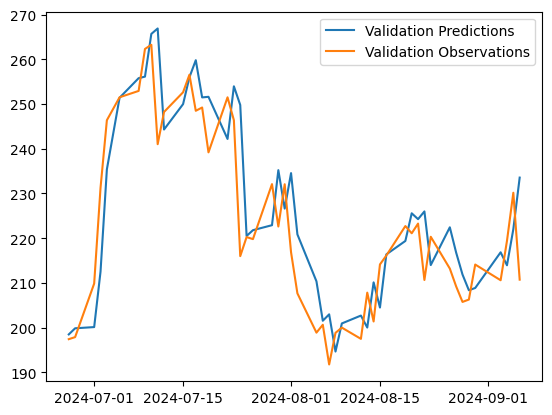

In [ ]:
val_predictions = model.predict(X_val).flatten()
plt. plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


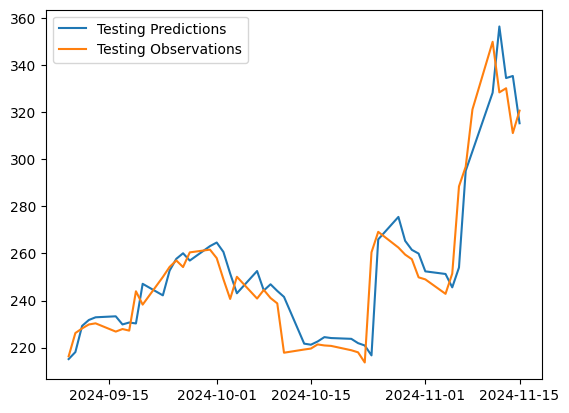

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

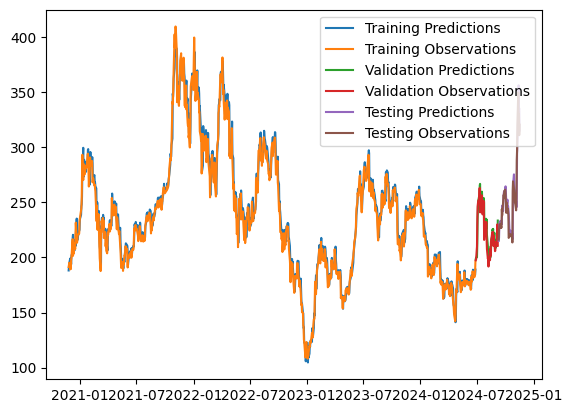

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

LSTM Can't extrapolate data well. (Extrapolate means predict data out of the time zone or outside your field of knowledge, create prediction) The LSTM Is only good at data it is familiar with.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


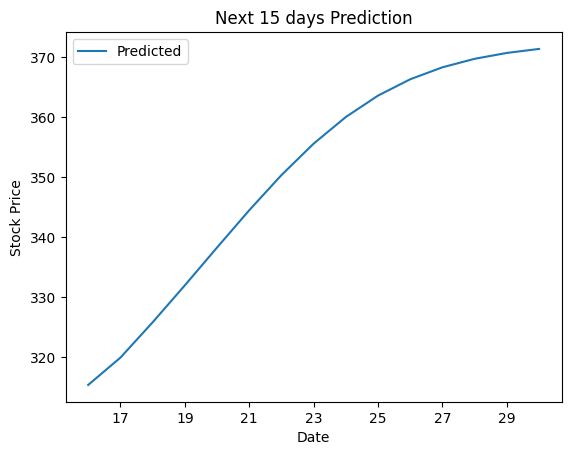

In [ ]:
import datetime
import matplotlib.dates as mdates

def predict_next_month(model, last_n_days, num_days=15):
    """
    Predicts the stock price for the next month, day by day.

    Args:
        model: The trained LSTM model.
        last_n_days: The last 'n' days of data used for the initial prediction.
        num_days: The number of days to predict (default: 30).

    Returns:
        A tuple containing the predicted dates and prices.
    """

    predictions = []
    current_date = dates_test[-1] + datetime.timedelta(days=1)  # Start from the day after the last test date
    input_data = last_n_days.reshape(1, last_n_days.shape[0], 1)  # Reshape for model input

    for _ in range(num_days):
        prediction = model.predict(input_data)[0, 0]  # Predict next day's price
        predictions.append(prediction)

        # Update input data with the prediction for the next iteration
        input_data = np.roll(input_data, -1, axis=1)  # Shift data one day back
        input_data[0, -1, 0] = prediction  # Replace last value with prediction

        current_date += datetime.timedelta(days=1)

    predicted_dates = [dates_test[-1] + datetime.timedelta(days=i + 1) for i in range(num_days)]

    return predicted_dates, predictions

# Get the last 15 days of data from the test set
last_15_days = X_test[-1, :, 0]

# Predict for the next 30 days
predicted_dates, predicted_prices = predict_next_month(model, last_15_days)

# Plot the predicted data
plt.plot(predicted_dates, predicted_prices, label='Predicted')
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.ylabel('Stock Price')
plt.title('Next 15 days Prediction')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

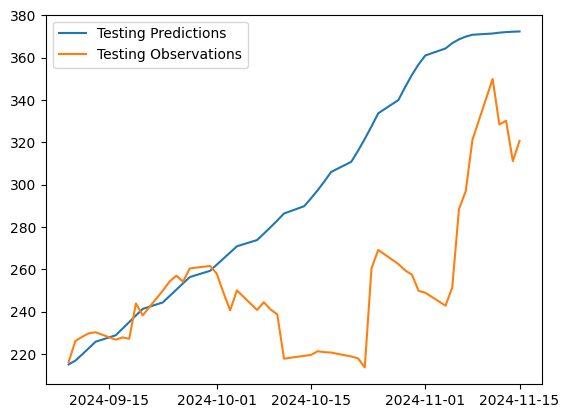

In [ ]:
test_predictions = []
input_data = X_test[0, :, 0]  # Start with the first 15 days of the test set

for i in range(len(dates_test)):
  # Reshape for model input
  input_data_reshaped = input_data.reshape(1, input_data.shape[0], 1)

  # Predict
  prediction = model.predict(input_data_reshaped)[0, 0]
  test_predictions.append(prediction)

  # Update input data
  input_data = np.roll(input_data, -1)  # Shift one step back
  input_data[-1] = prediction  # Replace last value with prediction

# Convert to NumPy array for plotting
test_predictions = np.array(test_predictions)

# Plot
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

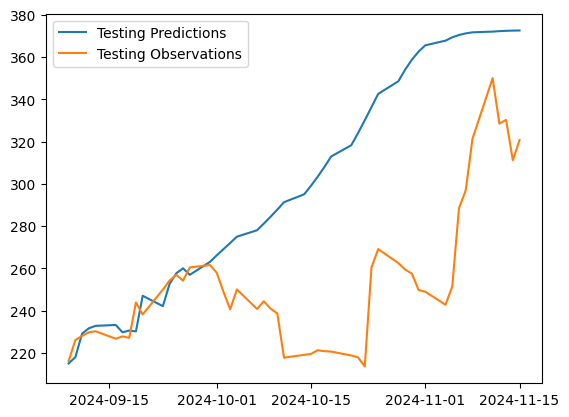

In [ ]:
test_predictions = []
input_data = X_test[0, :, 0]  # Start with the first 15 days of the test set

# Observation Phase (First 15 Days)
for i in range(15): #for the first 15 days
  input_data_reshaped = input_data.reshape(1, input_data.shape[0], 1)
  prediction = model.predict(input_data_reshaped)[0, 0]
  test_predictions.append(prediction)

  # Update with actual observation
  input_data = np.roll(input_data, -1)
  input_data[-1] = y_test[i]

# Prediction Phase (Next 15 Days)
for i in range(15, len(dates_test)):  # Start from day 16
  input_data_reshaped = input_data.reshape(1, input_data.shape[0], 1)
  prediction = model.predict(input_data_reshaped)[0, 0]
  test_predictions.append(prediction)

  # Update with prediction
  input_data = np.roll(input_data, -1)
  input_data[-1] = prediction

# Convert to NumPy array for plotting
test_predictions = np.array(test_predictions)

# Plot
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])